Taken from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

**Context**

Predict next-day rain by training classification models on the target variable RainTomorrow.

**Content**

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

**Source & Acknowledgements**

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.
An example of latest weather observations in Canberra: http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

**Definitions adapted from**
http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

**Data source:** 

http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.

**Copyright Commonwealth of Australia 2010, Bureau of Meteorology.**

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [57]:
data=pd.read_csv(r"/content/drive/MyDrive/weatherAUS.csv")  #Kindly put your path here
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Let us do basic EDA and data preprocessing first

In [58]:
#Finding the shape of the data
data.shape

(142193, 24)

So this means there are 142193 rows and 24 columns

In [59]:
#Find the datatype of each column
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [60]:
#Find the total number of NaN values in each column
print("Counts are:\n",data.isna().sum())
print("Frequencies are:\n", data.isna().sum()/len(data))

Counts are:
 Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64
Frequencies are:
 Date             0.000000
Location         0.000000
MinTemp          0.004480
MaxTemp          0.002265
Rainfall         0.009888
Evaporation      0.427890
Sunshine         0.476929
WindGustDir      0.065615
WindGustSpeed    0.065193
WindDir9am       0.070418
WindDir3pm       0.026570
WindSpeed9am     0.009480
WindSpeed3pm     0.018496
Humidity9am      0.012476
Humidity3pm      0.025388
Pressure9am   

This has given us some insights. One of the key things to observe here is that Evaporation, Sunshine and Cloud3pm columns have a NaN value around 40% of the times. So we need to figure out a strategy to handle null values. For this notebook, we will be dropping all rows of the table that have a NaN entry. This is because it would not be prudent to use other methods like forward fill or backward fill in case of the different columns. The reason for that is we cannot really predict the raintoday/tomorrow/ any of the other variables like humidity, pressure, clouds etc, based on the previous records. If we use a method like the ones previously mentioned, we could end up feeding wrong data to our model.


In [61]:
#Let us convert the date to a datetime object.
pd.to_datetime(data['Date'],errors='coerce', infer_datetime_format=True)

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
142188   2017-06-20
142189   2017-06-21
142190   2017-06-22
142191   2017-06-23
142192   2017-06-24
Name: Date, Length: 142193, dtype: datetime64[ns]

Now, as we can see, our rain today and rain tomorrow columns are strings that represent a yes/no condition. For our ML models, we need numerical data, and not string data. Therefore we will use one hot encoding to convert the data into a numerical type.

In [62]:
#Let's try to find the total number of unique values

data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [63]:
data['RainTomorrow'].unique()

array(['No', 'Yes'], dtype=object)

In [64]:
data['RainToday'].replace(to_replace="Yes",value=1, inplace=True)
data['RainToday'].replace(to_replace="No",value=0, inplace=True)

In [65]:
data['RainTomorrow'].replace(to_replace="Yes",value=1,inplace=True)
data['RainTomorrow'].replace(to_replace="No",value=0, inplace=True)

In [66]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,1.0,0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.2,0


In [67]:
data.dropna(inplace=True)

In [68]:
data.shape

(56420, 24)

So now, as we can see, our data has just 56420 rows, where all the entries are non null.

In [69]:
#let us perform a sanity check to ensure that no null values exist in our data
data.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

Cool! So we have dealt with one major roadblock. Now, let us approach the wind direction variables, which are also strings.

In [70]:
#Check the unique values first
data['WindDir3pm'].unique()

array(['SW', 'SSE', 'NNW', 'WSW', 'WNW', 'S', 'ENE', 'N', 'SE', 'NNE',
       'NW', 'E', 'ESE', 'NE', 'SSW', 'W'], dtype=object)

In [71]:
print(data['WindDir9am'].unique())
print(len(data['WindDir9am'].unique()))

['ENE' 'SSE' 'NNE' 'WNW' 'NW' 'N' 'S' 'SE' 'NE' 'W' 'SSW' 'E' 'NNW' 'ESE'
 'WSW' 'SW']
16


As we can see here, there are 16 unique wind directions. Now it is tiresome to do manual one hot encoding. So, let us use the dummies function in pandas which gives us the one hot encoding directly.

In [72]:
#Here we are using drop_first to be true because we only want "k-1" features from k cateogries
one_hot_windir9am=pd.get_dummies(data['WindDir9am'], drop_first=True)

In [73]:
#Now let us create a column that will act as our index and also our primary key
data['S.No.']=0
for i in range(len(data)):
  data['S.No.'].iloc[i]=i+1


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [74]:
data.set_index(keys='S.No.', inplace=True)

In [75]:
data.drop(labels='WindDir9am',axis='columns', inplace=True)

In [76]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
S.No.,,,,,,,,,,,,,,,,,,,,,,,
1,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0
2,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0
3,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0
4,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,0
5,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56416,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0,0
56417,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0,0
56418,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0,0


In [77]:
one_hot_windir9am['S.No.']=0
for i in range(len(data)):
  one_hot_windir9am['S.No.'].iloc[i]=i+1
one_hot_windir9am.set_index('S.No.')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
S.No.,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56416,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
56417,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
56418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [78]:
data=data.merge(right=one_hot_windir9am, on='S.No.')


In [79]:
data.head()

,S.No.,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,1,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,3,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,5,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [80]:
locations=data['Location'].unique()

So we have successfully dealt with the 9am wind directions. Let us now deal with the 3pm wind direction.

In [81]:
one_hot_windir3pm=pd.get_dummies(data['WindDir3pm'], drop_first=True)

In [82]:
data.drop(labels='WindDir3pm',axis='columns', inplace=True)

In [83]:
one_hot_windir3pm

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
56416,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
56417,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
56418,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [84]:
one_hot_windir3pm['S.No.']=0
for i in range(len(data)):
  one_hot_windir3pm['S.No.'].iloc[i]=i+1
one_hot_windir3pm.set_index('S.No.')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
S.No.,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56416,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
56417,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
56418,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [85]:
data=data.merge(right=one_hot_windir3pm, on='S.No.', suffixes='_x')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:7963: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [86]:
data.shape

(56420, 53)

In [87]:
#Okay now we see that there are two more columns which have categorical variables. So we need to do the One Hot encoding foor those columns
one_hot_wind_gustdir=pd.get_dummies(data['WindGustDir'], drop_first=True)

In [88]:
one_hot_wind_gustdir['S.No.']=0
for i in range(len(data)):
  one_hot_wind_gustdir['S.No.'].iloc[i]=i+1
one_hot_wind_gustdir.set_index('S.No.')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
S.No.,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56416,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56417,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56418,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
data=data.merge(right=one_hot_wind_gustdir, on='S.No.')

In [90]:
data.set_index('S.No.')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,ENE_,ESE_,N_,NE_,NNE_,NNW_,NW_,S_,SE_,SSE_,SSW_,SW_,W_,WNW_,WSW_,ENEx,ESEx,Nx,NEx,NNEx,NNWx,NWx,Sx,SEx,SSEx,SSWx,SWx,Wx,WNWx,WSWx,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56416,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56417,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56418,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
one_hot_wind_location=pd.get_dummies(data['Location'], drop_first=True)
one_hot_wind_location['S.No.']=0
for i in range(len(data)):
  one_hot_wind_location['S.No.'].iloc[i]=i+1
one_hot_wind_location.set_index('S.No.')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Darwin,Hobart,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,NorfolkIsland,Nuriootpa,Perth,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
S.No.,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56416,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56417,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
56418,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [92]:
data=data.merge(right=one_hot_wind_location, on='S.No.')

In [94]:
data.drop(labels='WindGustDir',axis='columns', inplace=True)
data.drop(labels='Location',axis='columns', inplace=True)

In [125]:
data=data.set_index('S.No.')

## Now that we are done with the Data Preprocessing Step, let us try and visualise the data.


In [101]:
locations=locations.tolist()

In [103]:
#First let us try to find out the distribution of the locations.
#This line of code will always give an error, do not worry about that. 
#This is because we have used one hot encoding, so in this case, Alice Springs hasnt been included in the column
#The number of records from Alice Springs would be the total length of data-the sum of the values of the other locations.
#We can do exception handling to do away with the exception. That could be your exercise.
d={}
for item in locations:
  d[item]=np.sum(data[item])
print(d)

KeyError: ignored

In [106]:
total=0
for item in d:
  total+=d[item]
AliceSprings=len(data)-total

In [107]:
d['AliceSprings']=AliceSprings

In [115]:
a=[i for i in range(1,len(locations)+1)]
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [118]:
cities=[]
counts=[]
for item in d:
  cities+=[item]
  counts+=[d[item]]
print(cities)
print(counts)

['Cobar', 'CoffsHarbour', 'Moree', 'NorfolkIsland', 'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Canberra', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura', 'Portland', 'Watsonia', 'Brisbane', 'Cairns', 'Townsville', 'MountGambier', 'Nuriootpa', 'Woomera', 'PerthAirport', 'Perth', 'Hobart', 'AliceSprings']
[534, 1380, 1913, 2464, 1690, 2870, 2416, 1198, 1078, 1678, 2929, 1898, 2594, 1863, 2730, 2953, 2444, 2419, 2465, 2008, 1734, 2913, 3025, 1939, 5284]


In [119]:
location_counts=pd.DataFrame.from_dict({'Cities':cities, 'Counts': counts})

In [126]:
location_counts['S.No.']=0
for i in range(len(location_counts)):
  location_counts['S.No.'].iloc[i]=i+1
location_counts=location_counts.set_index('S.No.')
location_counts

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Cities,Counts
S.No.,,
1,Cobar,534
2,CoffsHarbour,1380
3,Moree,1913
4,NorfolkIsland,2464
5,Sydney,1690
6,SydneyAirport,2870
7,WaggaWagga,2416
8,Williamtown,1198
9,Canberra,1078


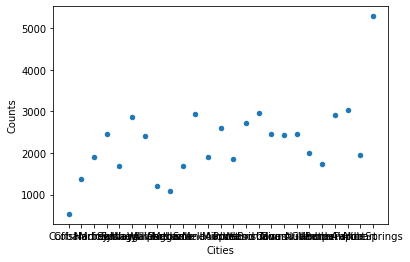

In [132]:

location_counts.plot(kind='scatter',x='Cities', y='Counts')


We can see that most of the counts lie between 1000 and 3000. We can deal with such data. 

Similarly, for the purposes of visualisation, we can go ahead and visualise each of the attributes we have. 


We will however see the distribution of Rain Today and Rain Tomorrow Fields. This will directly affect our models a lot.

In [140]:
print(data['RainTomorrow'])

S.No.
1        0
2        0
3        0
4        0
5        0
        ..
56416    0
56417    0
56418    0
56419    0
56420    0
Name: RainTomorrow, Length: 56420, dtype: int64


In [155]:
d1={}
d1['RainToday']=np.sum(data['RainToday'])
d1['RainTommorow']=np.sum(data['RainTomorrow'])
x=d1['RainTommorow']
y=d1['RainToday']
a=[y,x]
rain=pd.DataFrame.from_dict({'Stat':['RainToday', 'RainTomorrow'], 'Counts':a })
rain['S.No.']=0
for i in range(len(rain)):
  rain['S.No.'].iloc[i]=i+1
rain=rain.set_index('S.No.')
rain

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Stat,Counts
S.No.,,
1,RainToday,12462.0
2,RainTomorrow,12427.0


So out of 56420 records, only 12462 have raintoday as yes and 12427 have raintomorrow as yes. So this is certainly skewed data. So now, we have to adjust our training data in such a way that our model does not learn this unwanted bias. 

When we split our data, we will go with our usual paradigm of the 80:20 split. But the split would have to contain similar sample size for both yes and no classes while training. So we need a training set which is balanced, and we will now have to construct that.

# Data Processing (notice it is not pre-processing)

In [188]:
#If we need 80% to be our training data, we will need int(0.8 * 12427)=9942 records as yes, and a similar number as no
#But will we be getting 9942 records? Let's check out the distribution of values 
x=data.sum()
l=[]
for i in range(1,len(x)):
  l+=[x.iloc[i]]
minimum=min(l)

In [189]:
print(minimum)

534


In [ ]:
#Now as we can see, there are only 534 values for the  

In [ ]:
df=pd.DataFrame(columns=data.columns)
df=df.append(data.iloc[0])